In [1]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

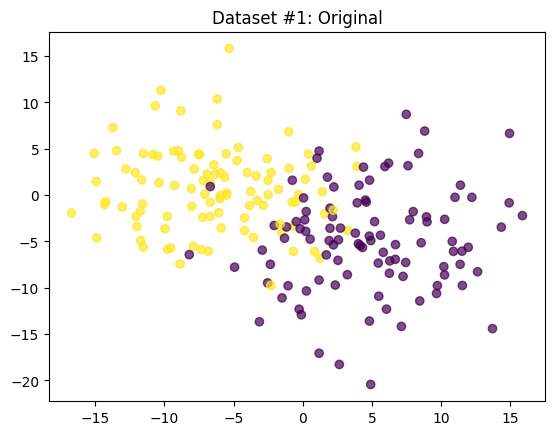

In [51]:
X1, label1 = make_blobs(n_samples = 200, n_features = 2, centers = 2, cluster_std = 5, random_state = 123)
plt.scatter(X1[:,0], X1[:,1], c= label1, alpha = 0.7)
plt.title("Dataset #1: Original")
plt.show()


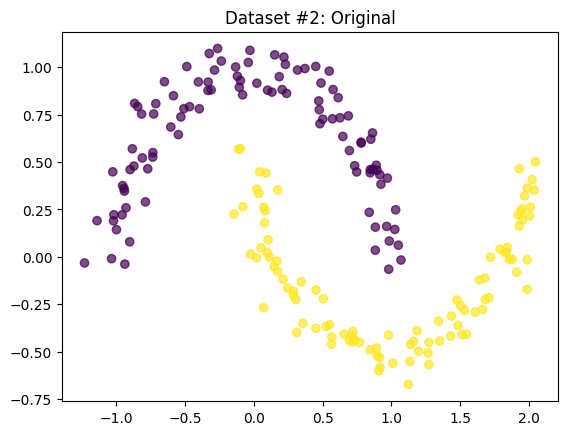

In [52]:
X2, label2 = make_moons(n_samples = 200, noise = 0.08, random_state = 123)
plt.scatter(X2[:,0], X2[:,1], c= label2, alpha = 0.7)
plt.title("Dataset #2: Original")
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

[0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1]


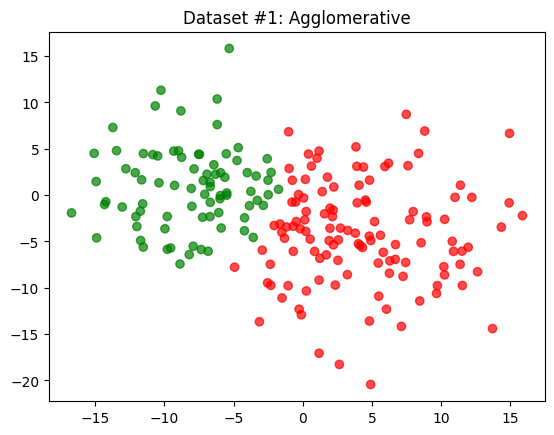

In [5]:
#ward se basa en reducir la varianza de los clusters

agglo = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
agglo.fit(X1)
print(agglo.labels_)


myColors = {0:"red", 1:"green"}
plt.scatter(X1[:,0], X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha = 0.7)
plt.title("Dataset #1: Agglomerative")
plt.show()


[1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0]


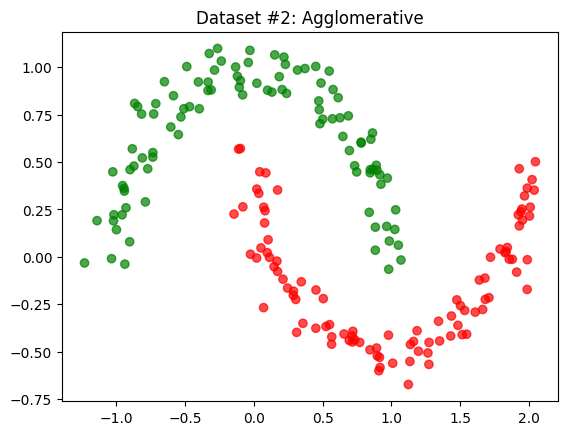

In [53]:
# Check the clusters for Dataset #2
# Pongo linkage = "single" para que se base en la distancia minima entre los puntos de los clusters
agglo = AgglomerativeClustering(n_clusters = 2,linkage="single")
agglo.fit(X2)
print(agglo.labels_)


myColors = {0:"red", 1:"green"}
plt.scatter(X2[:,0], X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha = 0.7)
plt.title("Dataset #2: Agglomerative")
plt.show()

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

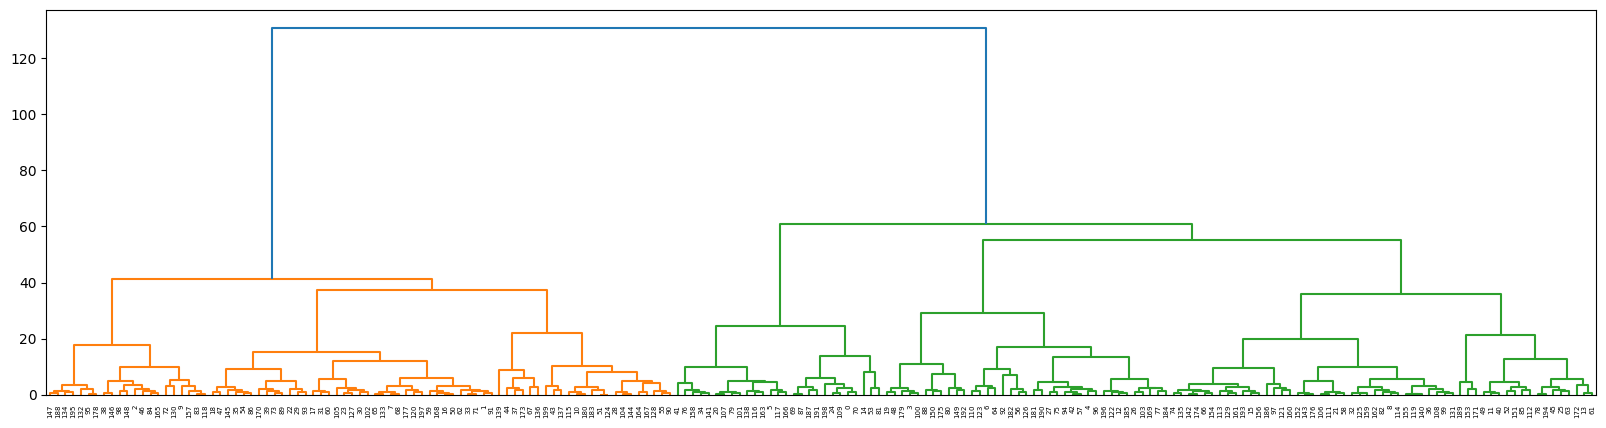

In [57]:
# con method = a single el resultado es malo, no se ve bien la jerarquia, lo cambiamos a ward
myLinkage = linkage(X1, method = "ward")
plt.figure(figsize = (20,5))
dendrogram(myLinkage)
plt.show()

In [59]:
labels = fcluster(myLinkage, 80, criterion = 'distance')
pd.Series(labels).value_counts()

2    119
1     81
Name: count, dtype: int64

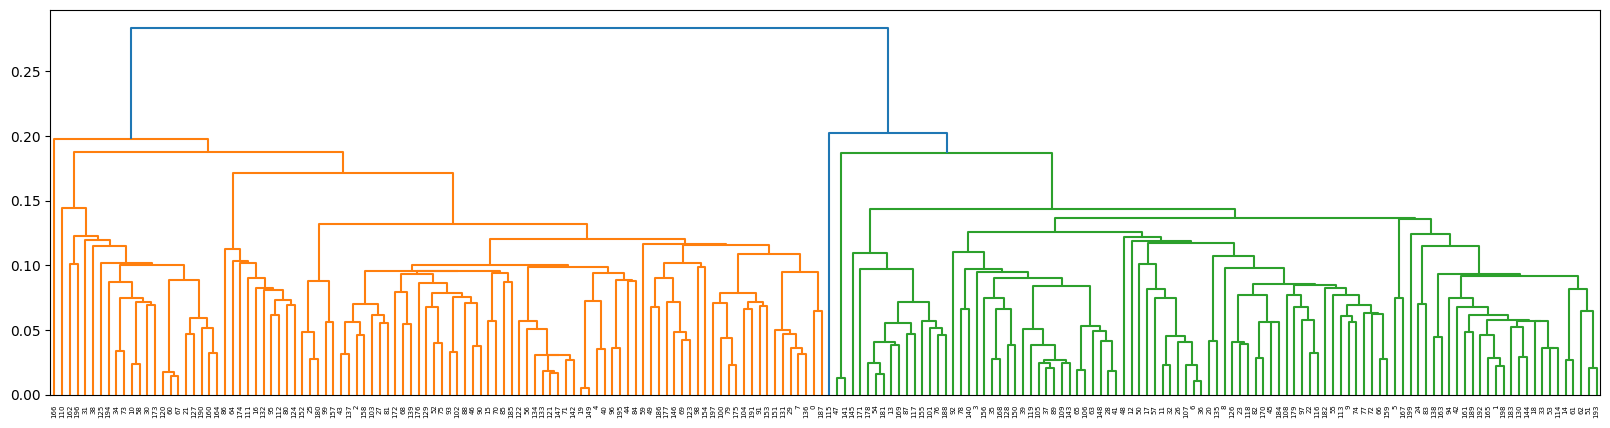

In [39]:
# Check the cluster for Dataset 2 and show the dendrogram.
# Cluster hierarchically using single linkage.


myLinkage = linkage(X2, method = "single")

plt.figure(figsize = (20,5))
dendrogram(myLinkage)
plt.show()


In [67]:
# Cut the dendrogram at the height (distance) = 0.23 (change this value at will) and show the clusters.

labels = fcluster(myLinkage, 0.23, criterion = 'distance')
pd.Series(labels).value_counts()

161    2
71     2
99     1
196    1
67     1
      ..
98     1
2      1
183    1
128    1
110    1
Name: count, Length: 198, dtype: int64

In [40]:
#IRIS

from sklearn.datasets import load_iris

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [42]:
iris = load_iris()

In [45]:
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data_pd.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [44]:
iris_data_pd.iloc[:,2:4]


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


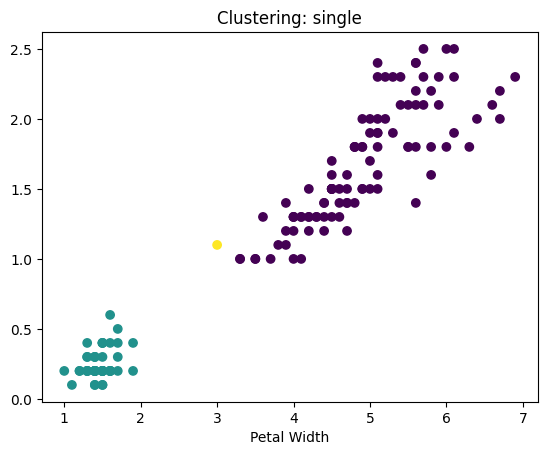

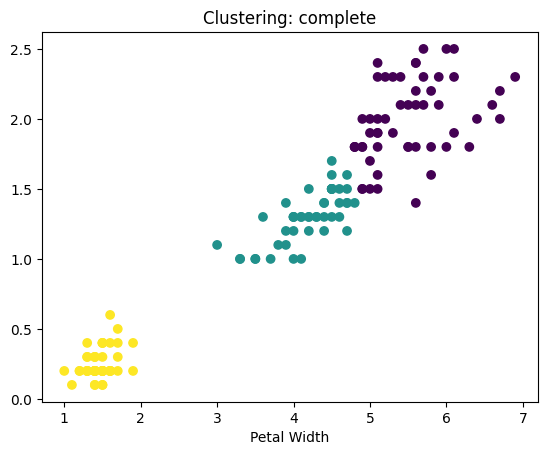

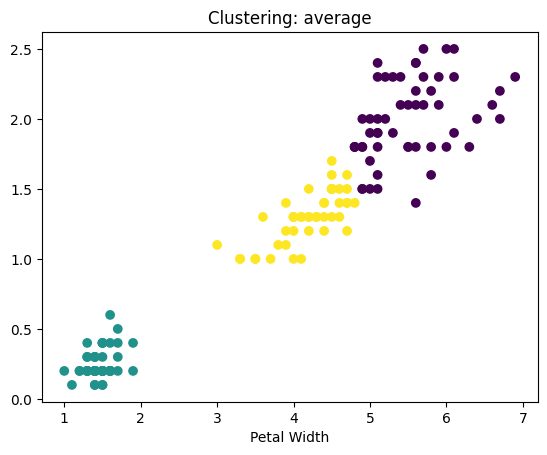

In [63]:
from sklearn.cluster import AgglomerativeClustering
linkage = {"complete", "average", "single"}
for idx, i in enumerate(linkage):
    plt.figure(idx)
    hier = AgglomerativeClustering(n_clusters = 3,  linkage = i, metric="euclidean")
    hier.fit(iris_data_pd.iloc[:,2:4])
    
    plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=hier.labels_)
    plt.title("Clustering: " + i)
    plt.xlabel("Petal Length")
    plt.xlabel("Petal Width")
    plt.show()

In [48]:
from scipy.cluster import hierarchy

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [82.5, 82.5, 113.75, 113.75],
  [65.0, 65.0, 98.125, 98.125],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [215.0, 215.0, 234.375, 234.375],
  [205.0, 205.0, 224.6875, 224.6875],
  [195.0, 195.0, 214.84375, 214.84375],
  [163.75, 163.75, 204.921875, 204.921875],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [184.3359375, 184.3359375, 291.25, 291.25],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [405.0, 

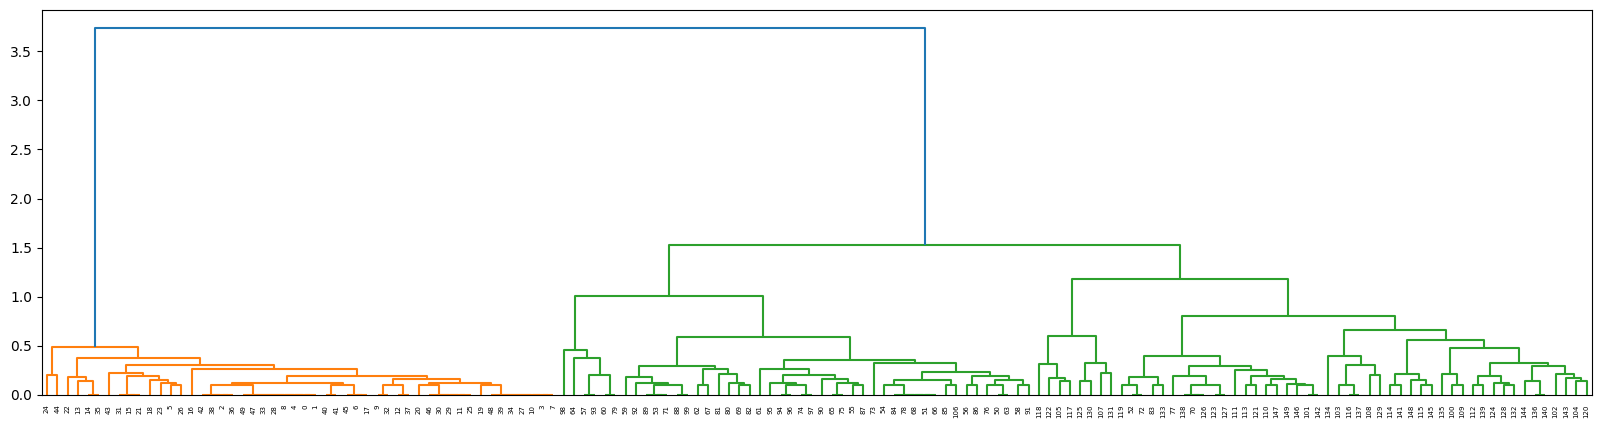

In [66]:
# As illustrated previously, use the hierarchy.linkage() method to check the dendrograms for the single and complete linkage.
hierar = hierarchy.linkage(iris_data_pd.iloc[:,2:4], method = "average")
plt.figure(figsize = (20,5))
dendrogram(hierar)

